In [1]:
import numpy as np
import pandas as pd
from vega_datasets import data

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = data.sf_temps()

In [3]:
df = df.set_index('date').sort_index()

In [4]:
#1 Resample by the day and take the avg temp. visualize.

In [5]:
dfavg = df.resample('1D').mean()

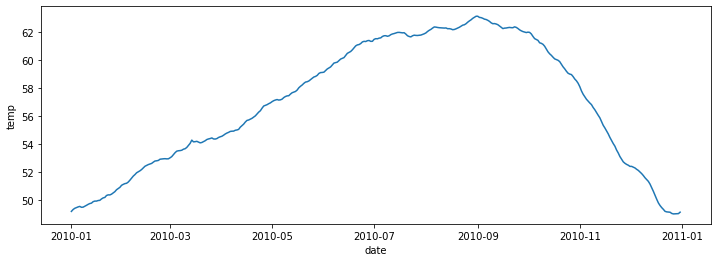

In [42]:
plt.figure(figsize=(12,4))
sns.lineplot(data=dfavg , x=dfavg.index, y='temp')
plt.show()

In [7]:
#2 min temp over time
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmin = df.resample('1D').min()

In [8]:
#2 max temp over time
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmax = df.resample('1D').max()

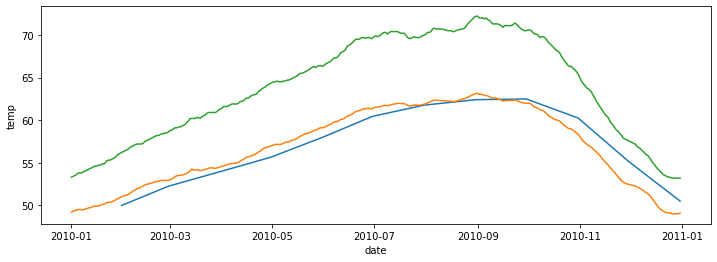

In [43]:
plt.figure(figsize=(12,4))
sns.lineplot(data=dfmin , x=dfmin.index, y='temp')
sns.lineplot(data=dfavg , x=dfavg.index, y='temp')
sns.lineplot(data=dfmax , x=dfmax.index, y='temp')
plt.show()

In [27]:
#which month is the coldest
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmin = df.resample('1M').mean()

In [32]:
dfmin.loc[dfmin['temp']== dfmin.temp.min()]

,temp
date,
2010-01-31,49.98414


In [31]:
#January coldest month  on avg

In [33]:
# hottest month has the highest avg temp
dfmin.loc[dfmin['temp']== dfmin.temp.max()]

,temp
date,
2010-09-30,62.487083


In [34]:
#september hottest month on avg

In [63]:
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfminmax = df.temp.resample('1D').agg(['min','max'])

In [64]:
dfminmax['dif'] = dfminmax['max'] - dfminmax['min']

In [70]:
dfminmax = dfminmax.resample('1M').mean()

In [73]:
#highest avg monthly difference month, August

In [74]:
dfminmax.loc[dfminmax['dif']== dfminmax.dif.max()]

,min,max,dif
date,,,
2010-08-31,57.2,72.2,15.0


In [93]:
#2 
df = data.seattle_weather()
df = df.set_index('date')

In [94]:
#which year month combination has the highest amount a preciptation
df = df.resample('M').sum()

In [95]:
#December 2015
df.loc[df['precipitation']== df.precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


<AxesSubplot:xlabel='date'>

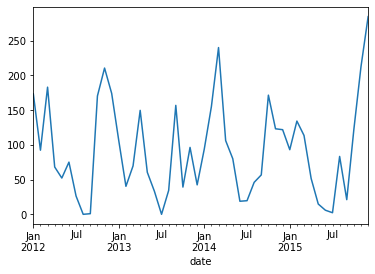

In [97]:
#visualize amount of precipitation over time
df.precipitation.plot()

<AxesSubplot:xlabel='date'>

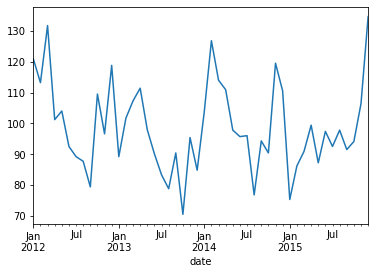

In [102]:
#visualize wind over time
df.wind.plot()

In [108]:
#which year-month combination was the windest
df = data.seattle_weather()
df = df.set_index('date')
df = df.resample('M').mean()
df.loc[df['wind']== df.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


In [139]:
#what year was the sunniest year?
df = data.seattle_weather()
df = df.set_index('date')
df.loc[df['weather']== 'sun', 'is_sunny'] = True
df.is_sunny = df.is_sunny.fillna(False)
df = df.resample('Y').mean()

In [141]:
df.loc[df['is_sunny']== df.is_sunny.max()]

,precipitation,temp_max,temp_min,wind,is_sunny
date,,,,,
2014-12-31,3.377534,16.99589,8.662466,3.387671,0.578082


In [260]:
#which month did it rain the most
df = data.seattle_weather()
df = df.set_index('date')
df['month'] = df.index.month

In [261]:
df.groupby('month').precipitation.sum().sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

In [262]:
df.loc[df['precipitation'] > 0, 'rain'] = True
df.rain = df.rain.fillna(False)

In [267]:
df.groupby('month').rain.mean().sort_values().tail(1)

month
12    0.653226
Name: rain, dtype: float64

In [306]:
#3
df = data.flights_20k()

In [307]:
df.loc[df['delay'] < 0, 'delay'] = 0

In [308]:
df = df.set_index('date').sort_index()

In [311]:
df['hour'] = df.index.hour

In [319]:
df.groupby('hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [320]:
df['dow']  = df.index.day_name()

In [322]:
df.groupby('dow').delay.mean()

dow
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [323]:
df['month'] = df.index.month

In [324]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64